In [2]:
import pandas as pd

In [3]:
dataset = pd.read_excel('autos_mazda.xlsx',sheet_name = 'autos')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           391 non-null    int64  
 1   Modelo       391 non-null    int64  
 2   Año          391 non-null    int64  
 3   Transmisión  391 non-null    object 
 4   motor        391 non-null    float64
 5   Carroceria   391 non-null    object 
 6   Kilometros   391 non-null    int64  
 7   Versión      391 non-null    object 
 8   Precio       391 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.6+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Quiero ver como estan distribuidas las correlaciones

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


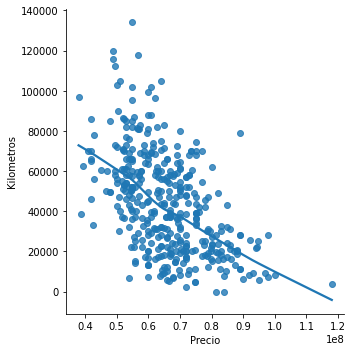

In [6]:
sns.lmplot(x='Precio', y='Kilometros', data=dataset, lowess=True);

**Aqui ya se que entre mas kilometros tenga un carro el valor del mismo es mas bajo.**

**Veamos que pasa si esto lo mezclo con el año, el tipo de carroceria, motor, transmisión y modelo.**

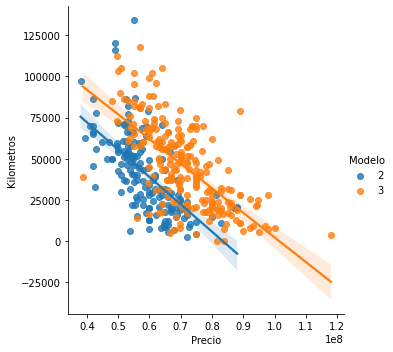

In [7]:
sns.lmplot(x='Precio', y='Kilometros', hue='Modelo', data=dataset);

**Hablando de precio y categoria el orden es el siguiente:
el mazda 2 es el vehiculo mas barato, siguente mazda 3 y por ultimo la mazda Cx-30 claro esta que tambien depende de la versión.**

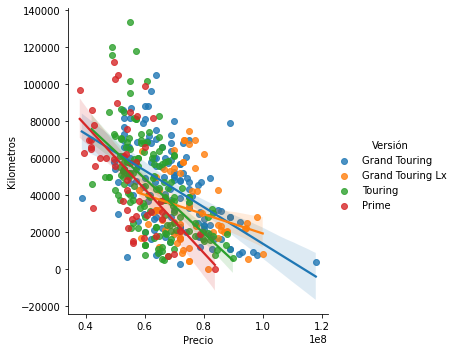

In [ ]:
sns.lmplot(x='Precio', y='Kilometros', hue='Versión', data=dataset);

**Vemos desde los mas barato hasta lo mas costoso puedo ver en la grafica que la versión mas barata es Prime y lo mas costoso es Grand Touring Lx, pero no simpre es asi, tambien se nota que hay vehiculos de categorias intermedias y no son los mas caros.**

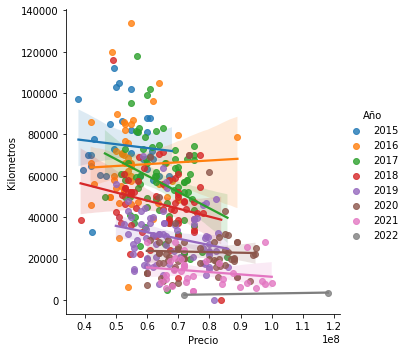

In [ ]:
sns.lmplot(x='Precio', y='Kilometros', hue='Año', data=dataset);

**Se alcanza a ver una segmentacion entre años, pero no en todos los casos los vehiculos mas antiguos son los mas baratos**

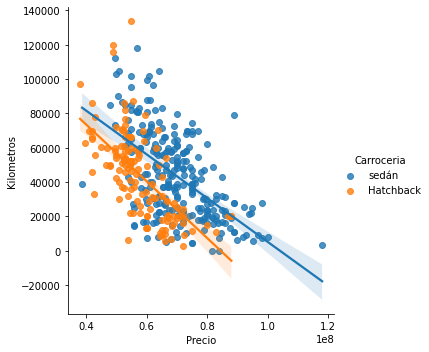

In [ ]:
sns.lmplot(x='Precio', y='Kilometros', hue='Carroceria', data=dataset);

**Por otra parte los vehiculos mas baratos son los Hatchback ya que son los mas pequeños y con motor pequeño y lo mas caro son las caminetas, digamos que los sedanes estan en un nivel intermedio.**

# Ahora quiero ver como y donde estan los valores atipicos, estos valores atipicos son los que me van a decir que vehiculos estan sobrevalorados.

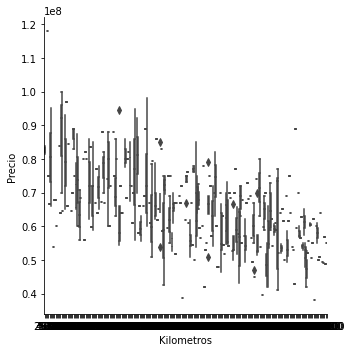

In [ ]:
sns.catplot(x='Kilometros', y='Precio', kind='box', data=dataset)

**Yo se que la grafica es muy rara, la utilice para que me muestre si existen valores atipicos y si que los hay, los atipicos son los punticos que estan alejados de las lineas en la parte de arriba son los vehiculos que el valor esta mas elevado que el promedio, lo mismo pasa con los punticos de abajo pero en ese caso son los mas baratos.**

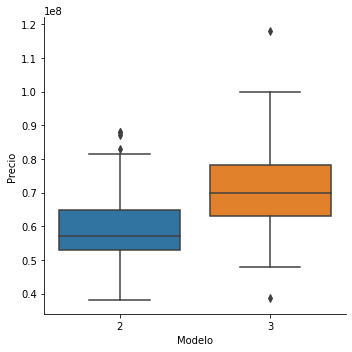

In [ ]:
sns.catplot(x='Modelo', y='Precio', kind='box', data=dataset)

**La distrubución de las cajas en los tres modelos es casi que es similar, los bigotes superiores e inferiores estan un poco lejados de las cajas esto siginifica que hay gran variedad entre precios, pero si existen atipicos con respecto a los modelos.**

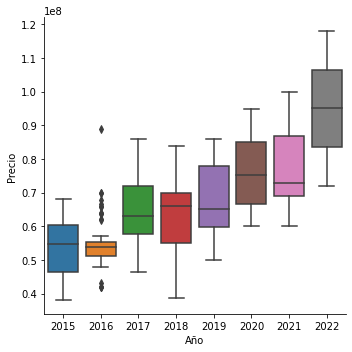

In [ ]:
sns.catplot(x='Año', y='Precio', kind='box', data=dataset)

**Se ve claramente que entre mas reciente es un vehuculo mas costoso es, en particular donde se ve mas variedad de precios es con los modelos del 2016, 2017,2018, y 2021**

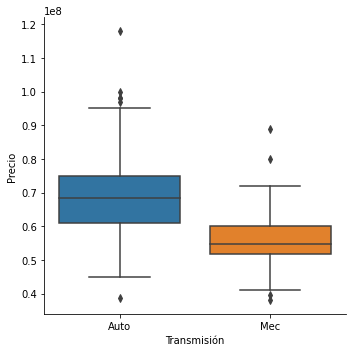

In [ ]:
sns.catplot(x='Transmisión', y='Precio', kind='box', data=dataset)

**Con los vehuculos automaticos es donde se ven mas precios con variedad, con respecto a el tipo de transmisión de un vehiculo es donde mas encontre valores atipicos y valores alejados del promedio.**

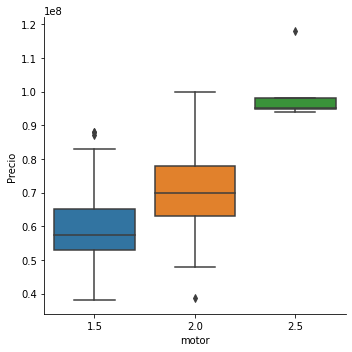

In [ ]:
sns.catplot(x='motor', y='Precio', kind='box', data=dataset)

**en cambio con el tipo de motor los precios se comportan de manera uniforme lo que significa que casi que hay una simetria entre los precios,pero no me dejar de aparecer valores atipicos.**

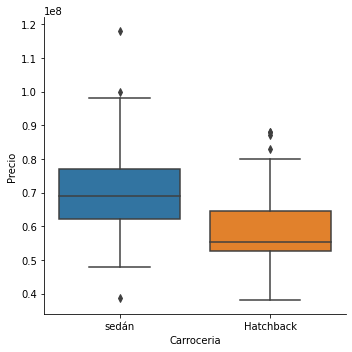

In [ ]:
sns.catplot(x='Carroceria', y='Precio', kind='box', data=dataset)

**En cambio con el tipo de carroceria es diferente los promedios entre carrocerias es diferente, y me siguen aparecoendo valores atipicos.**

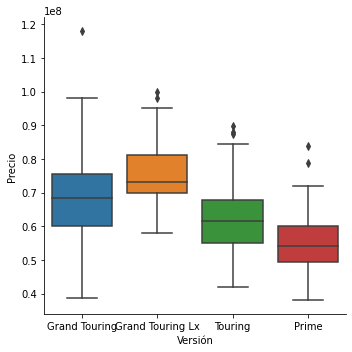

In [ ]:
sns.catplot(x='Versión', y='Precio', kind='box', data=dataset)

**Con las versiónes hay mucha variedad de precios, demasiados atipicos por encima de los maximos y bigites alejados de los promedios tanto para arriba como para abajo.**

# Identifique en todas las columnas que hay valores atipicos y valores que estan muy alejados del promedio tanto valores muy elevados como muy bajos.

# El kilometraje de un vehuculo es clave para determinar su precio.
los vehuculos con kilometraje superior al promedio y su valor esta por encima del tercer cuartil estos seran los vehiculos sobrevalorados.

si el kilometraje esta por encima del promedio y su valor esta por debajo del promedio estos seran los vehuculos con precio razonable, si los vehiculos no cumplen ninguna de estas condiciones los vehiculos seran de categoria negociable.

In [8]:
# medidas estadisticas mazda 3
dataset[(dataset['Modelo']==3)].describe().round(0)

,ID,Modelo,Año,motor,Kilometros,Precio
count,224.0,224.0,224.0,224.0,224.0,224.0
mean,2432.0,3.0,2018.0,2.0,45671.0,70949237.0
std,1880.0,0.0,2.0,0.0,25745.0,11574786.0
min,10.0,3.0,2015.0,2.0,1.0,38700000.0
25%,453.0,3.0,2017.0,2.0,23652.0,63000000.0
50%,4108.0,3.0,2018.0,2.0,43750.0,69900000.0
75%,4164.0,3.0,2019.0,2.0,64000.0,78125000.0
max,4220.0,3.0,2022.0,2.0,118000.0,118000000.0


In [9]:
# Mazda 3 precio razonables
tres_razonable = dataset[(dataset['Modelo']==3) & (dataset['Kilometros'] > 45671) & (dataset['Precio'] < 69900000)]

In [13]:
# Mazda 3 precio sobrevalorado
tres_sobrevalorado = dataset[(dataset['Modelo']==3) & (dataset['Kilometros'] >= 45671) & (dataset['Precio'] >= 69900000)]

In [14]:
# mazda 3 precio a negociar
tres = dataset[dataset['Modelo']==3]

In [15]:
tres = tres.drop(tres_razonable.index)
tres = tres.drop(tres_sobrevalorado.index)

In [16]:
tres_razonable['Estado'] = 'Precio razonable'
tres_sobrevalorado['Estado'] = 'Precio sobrevalorado'
tres['Estado'] = 'Precio negociable'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
tres_razonable = tres_razonable[['ID','Estado']]
tres_sobrevalorado = tres_sobrevalorado[['ID','Estado']]
tres = tres[['ID','Estado']]

In [18]:
print(tres_razonable.shape)
print(tres_sobrevalorado.shape)
print(tres.shape)

(75, 2)
(33, 2)
(116, 2)


In [19]:
# medidas estadisticas mazda 2
dataset[(dataset['Modelo']==2)].describe().round(0)

,ID,Modelo,Año,motor,Kilometros,Precio
count,167.0,167.0,167.0,167.0,167.0,167.0
mean,4304.0,2.0,2018.0,2.0,41090.0,58727240.0
std,48.0,0.0,2.0,0.0,24030.0,9344150.0
min,4221.0,2.0,2015.0,2.0,2500.0,38000000.0
25%,4262.0,2.0,2016.0,2.0,20750.0,52950000.0
50%,4304.0,2.0,2018.0,2.0,40000.0,57000000.0
75%,4346.0,2.0,2020.0,2.0,56000.0,64750000.0
max,4387.0,2.0,2022.0,2.0,134000.0,88000000.0


In [20]:
# Mazda 2  razonables
dos_razonable = dataset[(dataset['Modelo']==2) & (dataset['Kilometros'] > 41090) & (dataset['Precio'] < 57000000)]

In [21]:
# Mazda 2 sobrevalorados
dos_sobrevalorado = dataset[(dataset['Modelo']==2) & (dataset['Kilometros'] >= 41090) & (dataset['Precio'] >= 57000000)]

In [22]:
# mazda 2 precio a negociar
dos = dataset[dataset['Modelo']==2]

In [23]:
dos = dos.drop(dos_razonable.index)
dos = dos.drop(dos_sobrevalorado.index)

In [24]:
dos_razonable['Estado'] = 'Precio razonable'
dos_sobrevalorado['Estado'] = 'Precio sobrevalorado'
dos['Estado'] = 'Precio negociable'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
dos_razonable = dos_razonable[['ID','Estado']]
dos_sobrevalorado = dos_sobrevalorado[['ID','Estado']]
dos = dos[['ID','Estado']]

In [26]:
print(dos_razonable.shape)
print(dos_sobrevalorado.shape)
print(dos.shape)
print(tres_razonable.shape)
print(tres_sobrevalorado.shape)
print(tres.shape)

(63, 2)
(16, 2)
(88, 2)
(75, 2)
(33, 2)
(116, 2)


In [27]:
dataset.shape

(391, 9)

In [28]:
# concateno todos los segmentos
segmentos = pd.concat([dos_razonable,dos_sobrevalorado,dos,tres_razonable,tres_sobrevalorado,tres])

In [29]:
# los segmentos los concateno con el dataset original para formar una sola base de datos
dataset = pd.merge(dataset,segmentos, on = ['ID'], how = 'inner')

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           391 non-null    int64  
 1   Modelo       391 non-null    int64  
 2   Año          391 non-null    int64  
 3   Transmisión  391 non-null    object 
 4   motor        391 non-null    float64
 5   Carroceria   391 non-null    object 
 6   Kilometros   391 non-null    int64  
 7   Versión      391 non-null    object 
 8   Precio       391 non-null    int64  
 9   Estado       391 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 33.6+ KB


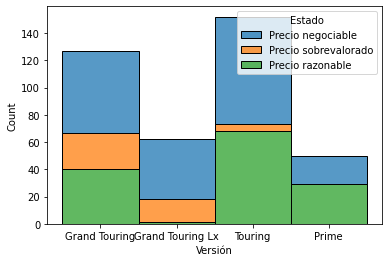

In [52]:
sns.histplot(data=dataset, x='Versión', hue='Estado', multiple='stack')

**Vemos que los vehiculos sobrevalorados se ven con mas frecuencia en las versiones Grand Touring y Grand Touring Lx en estas versiones esta la falancia con respecto a los precios.**

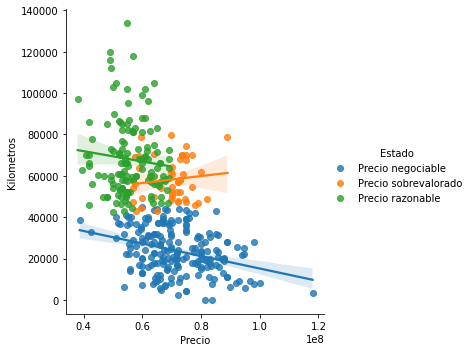

In [30]:
sns.lmplot(x='Precio', y='Kilometros', hue='Estado', data=dataset);

**Que pasa con los sobrevalorados?
Resulta que estos vehiculos se quedaron estancados con el precios, no bajan de precio como los demas y su kilometraje es alto.**

In [31]:
dataset['Estado'].value_counts()

Precio negociable       204
Precio razonable        138
Precio sobrevalorado     49
Name: Estado, dtype: int64

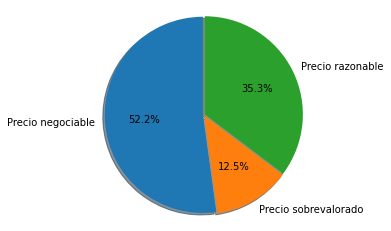

In [32]:
labels = dataset['Estado'].unique()
sizes = [204,49,138]
explode = (0.01, 0.01, 0.01)  

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**No esta mal la distribución es bueno es que los sobrevalorados esten en la minoria, me hubiera gustado que los carros que estan es estado negociable sea un poco menos que los carros con precios negociables.**

# Ya segmente los vehiculos si estan sobrevalorados o no, ahora lo que sigue es identificar datos de vehiculos que no estan segmentados para saber y darnos una idea de como negociar un vehiculo usado que no este segmentado.

# y esto lo hago con un algoritmo de machine learning de clasificación pero antes hay que tranformar los datos a numeros para que el algoritmo pueda trabajar.

# Transformación de los datos

In [33]:
dataset

,ID,Modelo,Año,Transmisión,motor,Carroceria,Kilometros,Versión,Precio,Estado
0,10,3,2020,Auto,2.0,sedán,27914,Grand Touring,88900000,Precio negociable
1,20,3,2017,Auto,2.0,sedán,58164,Grand Touring Lx,72900000,Precio sobrevalorado
2,30,3,2017,Auto,2.0,sedán,57000,Grand Touring,72000000,Precio sobrevalorado
3,40,3,2020,Auto,2.0,sedán,11000,Grand Touring,89000000,Precio negociable
4,41,3,2019,Auto,2.0,sedán,39000,Touring,75000000,Precio negociable
...,...,...,...,...,...,...,...,...,...,...
386,4383,2,2019,Auto,1.5,sedán,7758,Grand Touring,63800000,Precio negociable
387,4384,2,2019,Mec,1.5,sedán,43000,Prime,53900000,Precio razonable
388,4385,2,2019,Mec,1.5,sedán,37000,Grand Touring,61000000,Precio negociable
389,4386,2,2019,Mec,1.5,sedán,15200,Prime,55900000,Precio negociable


In [32]:
dataset['Transmisión'] = dataset['Transmisión'].replace({'Auto':0,'Mec':1})
dataset['Carroceria'] = dataset['Carroceria'].replace({'sedán':0,'Hatchback':1})
dataset['Versión'] = dataset['Versión'].replace({'Grand Touring':0,'Grand Touring Lx':1,'Touring':2,'Prime':3,})
dataset['Estado'] = dataset['Estado'].replace({'Precio negociable':0,'Precio sobrevalorado':1,'Precio razonable':2})

In [33]:
dataset

,ID,Modelo,Año,Transmisión,motor,Carroceria,Kilometros,Versión,Precio,Estado
0,10,3,2020,0,2.0,0,27914,0,88900000,0
1,20,3,2017,0,2.0,0,58164,1,72900000,1
2,30,3,2017,0,2.0,0,57000,0,72000000,1
3,40,3,2020,0,2.0,0,11000,0,89000000,0
4,41,3,2019,0,2.0,0,39000,2,75000000,0
...,...,...,...,...,...,...,...,...,...,...
386,4383,2,2019,0,1.5,0,7758,0,63800000,0
387,4384,2,2019,1,1.5,0,43000,3,53900000,2
388,4385,2,2019,1,1.5,0,37000,0,61000000,0
389,4386,2,2019,1,1.5,0,15200,3,55900000,0


# Ahora machine learning

In [34]:
import sklearn

from sklearn.model_selection import train_test_split # esto para dividir los datos de entrenamiento y prueba
from sklearn.ensemble import BaggingClassifier # bagging me ayuda a mejorar el desempeño del algoritmo
from sklearn.ensemble import RandomForestClassifier # el algortimo que uso para clasificar


from sklearn.metrics import accuracy_score # para calcular la precisión del algoritmo

import warnings
warnings.filterwarnings("ignore")

In [35]:
x = dataset.drop(['ID','Estado',],axis=1)

In [36]:
y = dataset['Estado']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
bosque = RandomForestClassifier(random_state=0)

In [39]:
clasificador = BaggingClassifier(base_estimator = bosque, n_estimators=50).fit(x_train, y_train)

In [40]:
pruebas = clasificador.predict(x_test)

In [41]:
print('LA PRECISIÓN ES DEL : {}'.format(accuracy_score(pruebas, y_test)))

LA PRECISIÓN ES DEL : 0.9491525423728814


# EL ALGORITMO FUNCIONA MUY BIEN AHORA VEAMOS SI PUEDE TRABAJAR CON DATOS NUEVOS Y LOS PUEDE CLASIFICAR.

In [68]:
data = pd.read_excel('predicciones.xlsx')
predicciones = pd.read_excel('predicciones.xlsx')

In [69]:
# solo una muestra con 6 registros
data.sample(6)

,Modelo,Año,Transmisión,motor,Carroceria,kilometros,Versión,precio
3,2,2018,Auto,1.5,Hatchback,70554,Grand Touring,63900000
7,2,2019,Mec,1.5,Hatchback,21500,Prime,53000000
13,2,2018,Auto,1.5,Hatchback,50000,Touring,56000000
18,2,2019,Mec,1.5,Hatchback,26000,Prime,53900000
14,2,2016,Auto,1.5,Hatchback,70000,Grand Touring,55900000
6,2,2021,Auto,1.5,Sedán,8400,Touring,61000000


**Estos datos tambien hay que transformarlos para el algoritmo los pueda clasificar.**

In [70]:
predicciones['Transmisión'] = predicciones['Transmisión'].replace({'Auto':0,'Mec':1})
predicciones['Carroceria'] = predicciones['Carroceria'].replace({'Sedán':0,'Hatchback':1})
predicciones['Versión'] = predicciones['Versión'].replace({'Grand Touring':0,'Grand Touring Lx':1,'Touring':2,'Prime':3,})

In [71]:
predicciones.sample(6)

,Modelo,Año,Transmisión,motor,Carroceria,kilometros,Versión,precio
15,3,2020,0,2.0,0,23000,0,85900000
10,3,2017,0,2.0,0,50000,0,73900000
3,2,2018,0,1.5,1,70554,0,63900000
23,3,2017,0,2.0,0,61000,0,63500000
21,3,2019,0,2.0,0,30000,0,70000000
2,2,2017,1,1.5,1,56000,2,57600000


In [73]:
estado = clasificador.predict(predicciones)

In [74]:
data['Estado'] = estado

**Transformo los estados para que sean mas legibles con la data original**

In [76]:
#dataset['Estado'] = dataset['Estado'].replace({'Precio negociable':0,'Precio sobrevalorado':1,'Precio razonable':2})
data['Estado'] = data['Estado'].replace({0:'Precio negociable',1:'Precio sobrevalorado',2:'Precio razonable'})

In [77]:
data

,Modelo,Año,Transmisión,motor,Carroceria,kilometros,Versión,precio,Estado
0,2,2019,Mec,1.5,Sedán,33000,Touring,46000000,Precio negociable
1,2,2019,Auto,1.5,Sedán,20200,Touring,59990000,Precio negociable
2,2,2017,Mec,1.5,Hatchback,56000,Touring,57600000,Precio razonable
3,2,2018,Auto,1.5,Hatchback,70554,Grand Touring,63900000,Precio sobrevalorado
4,2,2016,Mec,1.5,Hatchback,62000,Grand Touring,50200000,Precio razonable
5,2,2020,Mec,1.5,Sedán,28000,Prime,58000000,Precio negociable
6,2,2021,Auto,1.5,Sedán,8400,Touring,61000000,Precio negociable
7,2,2019,Mec,1.5,Hatchback,21500,Prime,53000000,Precio negociable
8,2,2019,Auto,1.5,Sedán,57000,Grand Touring,50000000,Precio sobrevalorado
9,3,2017,Auto,2.0,Sedán,61790,Touring,70000000,Precio sobrevalorado


# Segmente los vehiculos por 'Precio razonable','Precio negociable','Precio sobrevalorado', luego con esos mismos datos entrene un modelo de machine learning y ahora con ese mismo modelo puedo clasificar vehiculos y me diga si su precio es razonable o negociable o sobrevalorado.


# Muchas personas compran un carro usado pero hay lugares donde se los venden a un precio muy elevado a lo que el carro verdaderamente vale. y este proyecto es la solución a este problema.